# Part B - Applications (version2 - with scaling)

**Note: Your code/analysis should be self-explanatory with necessary comments.**

**You should prepare a tutorial for this part. Your tutorial should include the following:**

- **Loading the dataset and setting up the dependent variable**
- **Writing the code for each classification method**
- **Printing the output and interpreting the results**
- **Summarizing the findings and discussing the pros and cons of each method**

**Load the "penguins" dataset in seaborn**

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
df = sns.load_dataset('penguins')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [19]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [20]:
# I don't think there are any good ways to substitute the missing values, so I'm just going to drop them
df = df.dropna()

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex'] = encoder.transform(df['sex'])

In [22]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


# Question 1

**Cluster the dataset using K-means. For each K, develop your hypothesis first, then verify if your hypothesis is correct.**

I assume that the "species" column can act as the label (and clustering uses unlabelled data). And there are three unique species, so that's the reason why I'm initially going to choose a k value of 3. (And see if it can cluster data into the three species.)

## Test1

First, I want to test the clustering results if I take out the label "species" AND the highly correlated "island" column. 

In [23]:
data = df.drop(columns=['species','island'])
label = df[['species']]

In [24]:
data = StandardScaler().fit_transform(data)

In [25]:
kmeans_model = KMeans(n_clusters=3,random_state=123).fit(data)

In [26]:
pd.DataFrame(kmeans_model.predict(data),index=df.index).head()

,0
0,1
1,2
2,2
4,2
5,1


In [27]:
pd.concat([label,pd.DataFrame(kmeans_model.predict(data),index=df.index)],axis=1).head(10)

,species,0
0,Adelie,1
1,Adelie,2
2,Adelie,2
4,Adelie,2
5,Adelie,1
6,Adelie,2
7,Adelie,1
12,Adelie,2
13,Adelie,1
14,Adelie,1


Even just looking at the first 10 columns, It doesn't appear that it (always) clustered by species (even if "Adelie" = cluster 0, there are some that made it to cluster 2 as well.)

## Test2

I'm going to test clustering using the same data except including the 'island' column. (Which I need to encode because Python can only work with numerical data"

In [28]:
df2 = df.copy()

In [29]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [30]:
encoder2 = LabelEncoder()
encoder2.fit(df2['island'])
df2['island'] = encoder2.transform(df2['island'])

In [31]:
df2['island'].unique()

array([2, 0, 1])

In [32]:
data2 = df2.drop(columns=['species'])
label2 = df2[['species']]

In [33]:
data2 = StandardScaler().fit_transform(data2)

In [34]:
kmeans_model2 = KMeans(n_clusters=3,random_state=123).fit(data2)

In [35]:
pd.concat([label2,pd.DataFrame(kmeans_model2.predict(data2),index=df2.index)],axis=1)

,species,0
0,Adelie,2
1,Adelie,1
2,Adelie,1
4,Adelie,1
5,Adelie,2
...,...,...
338,Gentoo,0
340,Gentoo,0
341,Gentoo,0
342,Gentoo,0


There's a method by pandas to check if two data frames are identical to each other.  (`pd.DataFrame.equals()`)

In [36]:
#clustering model w/o "island" column as data
pred1 = pd.DataFrame(kmeans_model.predict(data),index=df.index)
#clustering model w/ "island" columns as data
pred2 = pd.DataFrame(kmeans_model2.predict(data2),index=df2.index)

# check if clusters made each way are identical
pred1.equals(pred2)

False

This time they are not the same!

In [37]:
# create a single dataframe that compares the actual species label with clusters by the clustering model
compare_results = pd.concat([label2,pred2],axis=1)
compare_results.head(10)

,species,0
0,Adelie,2
1,Adelie,1
2,Adelie,1
4,Adelie,1
5,Adelie,2
6,Adelie,1
7,Adelie,2
12,Adelie,1
13,Adelie,2
14,Adelie,2


In [38]:
# cluster results in respect to Adelie species
adelie = compare_results[compare_results['species']=='Adelie']
adelie.iloc[:,1].value_counts()

1    73
2    73
Name: 0, dtype: int64

In [39]:
# cluster results in respect to Chinstrp species
chinstrap = compare_results[compare_results['species']=='Chinstrap']
chinstrap.iloc[:,1].value_counts()

1    34
2    34
Name: 0, dtype: int64

In [40]:
# cluster results in respect to Gentoo species
gentoo = compare_results[compare_results['species']=='Gentoo']
gentoo.iloc[:,1].value_counts()

0    119
Name: 0, dtype: int64

The above shows the cluster results of each row that are associated with each unique species in the data. Apparently, there's an even split of clusters within the Chinstrap and Adelies specie (but the Gentoo cluster is perfectly clustered into its own cluster).

So now I want to try clustering with k=2.

## Test 3

In [41]:
kmeans_model3 = KMeans(n_clusters=2,random_state=123).fit(data2)

In [42]:
kmeans_model3.predict(data2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
pred3 = pd.DataFrame(kmeans_model3.predict(data2),index=df2.index)

# create a single dataframe that compares the actual species label with clusters by the clustering model
compare_results2 = pd.concat([label2,pred3],axis=1)
compare_results2.head(10)

,species,0
0,Adelie,1
1,Adelie,1
2,Adelie,1
4,Adelie,1
5,Adelie,1
6,Adelie,1
7,Adelie,1
12,Adelie,1
13,Adelie,1
14,Adelie,1


In [44]:
# cluster results in respect to Adelie species
adelie = compare_results2[compare_results['species']=='Adelie']
adelie.iloc[:,1].value_counts()

1    146
Name: 0, dtype: int64

In [45]:
# cluster results in respect to Chinstrp species
chinstrap = compare_results2[compare_results['species']=='Chinstrap']
chinstrap.iloc[:,1].value_counts()

1    68
Name: 0, dtype: int64

In [46]:
# cluster results in respect to Gentoo species
gentoo = compare_results[compare_results['species']=='Gentoo']
gentoo.iloc[:,1].value_counts()

0    119
Name: 0, dtype: int64

Okay, this evaluation suggests that it "does better" with k=2. Apparently, K-means wants to group the Adelies and Chinstraps species together, and then Gentoo is just somehow noticeably different from those two species. 

# Question 2

**Cluster the dataset using a hierarchical method.**

In [47]:
hierclust = AgglomerativeClustering()
hierclust.fit_predict(data2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

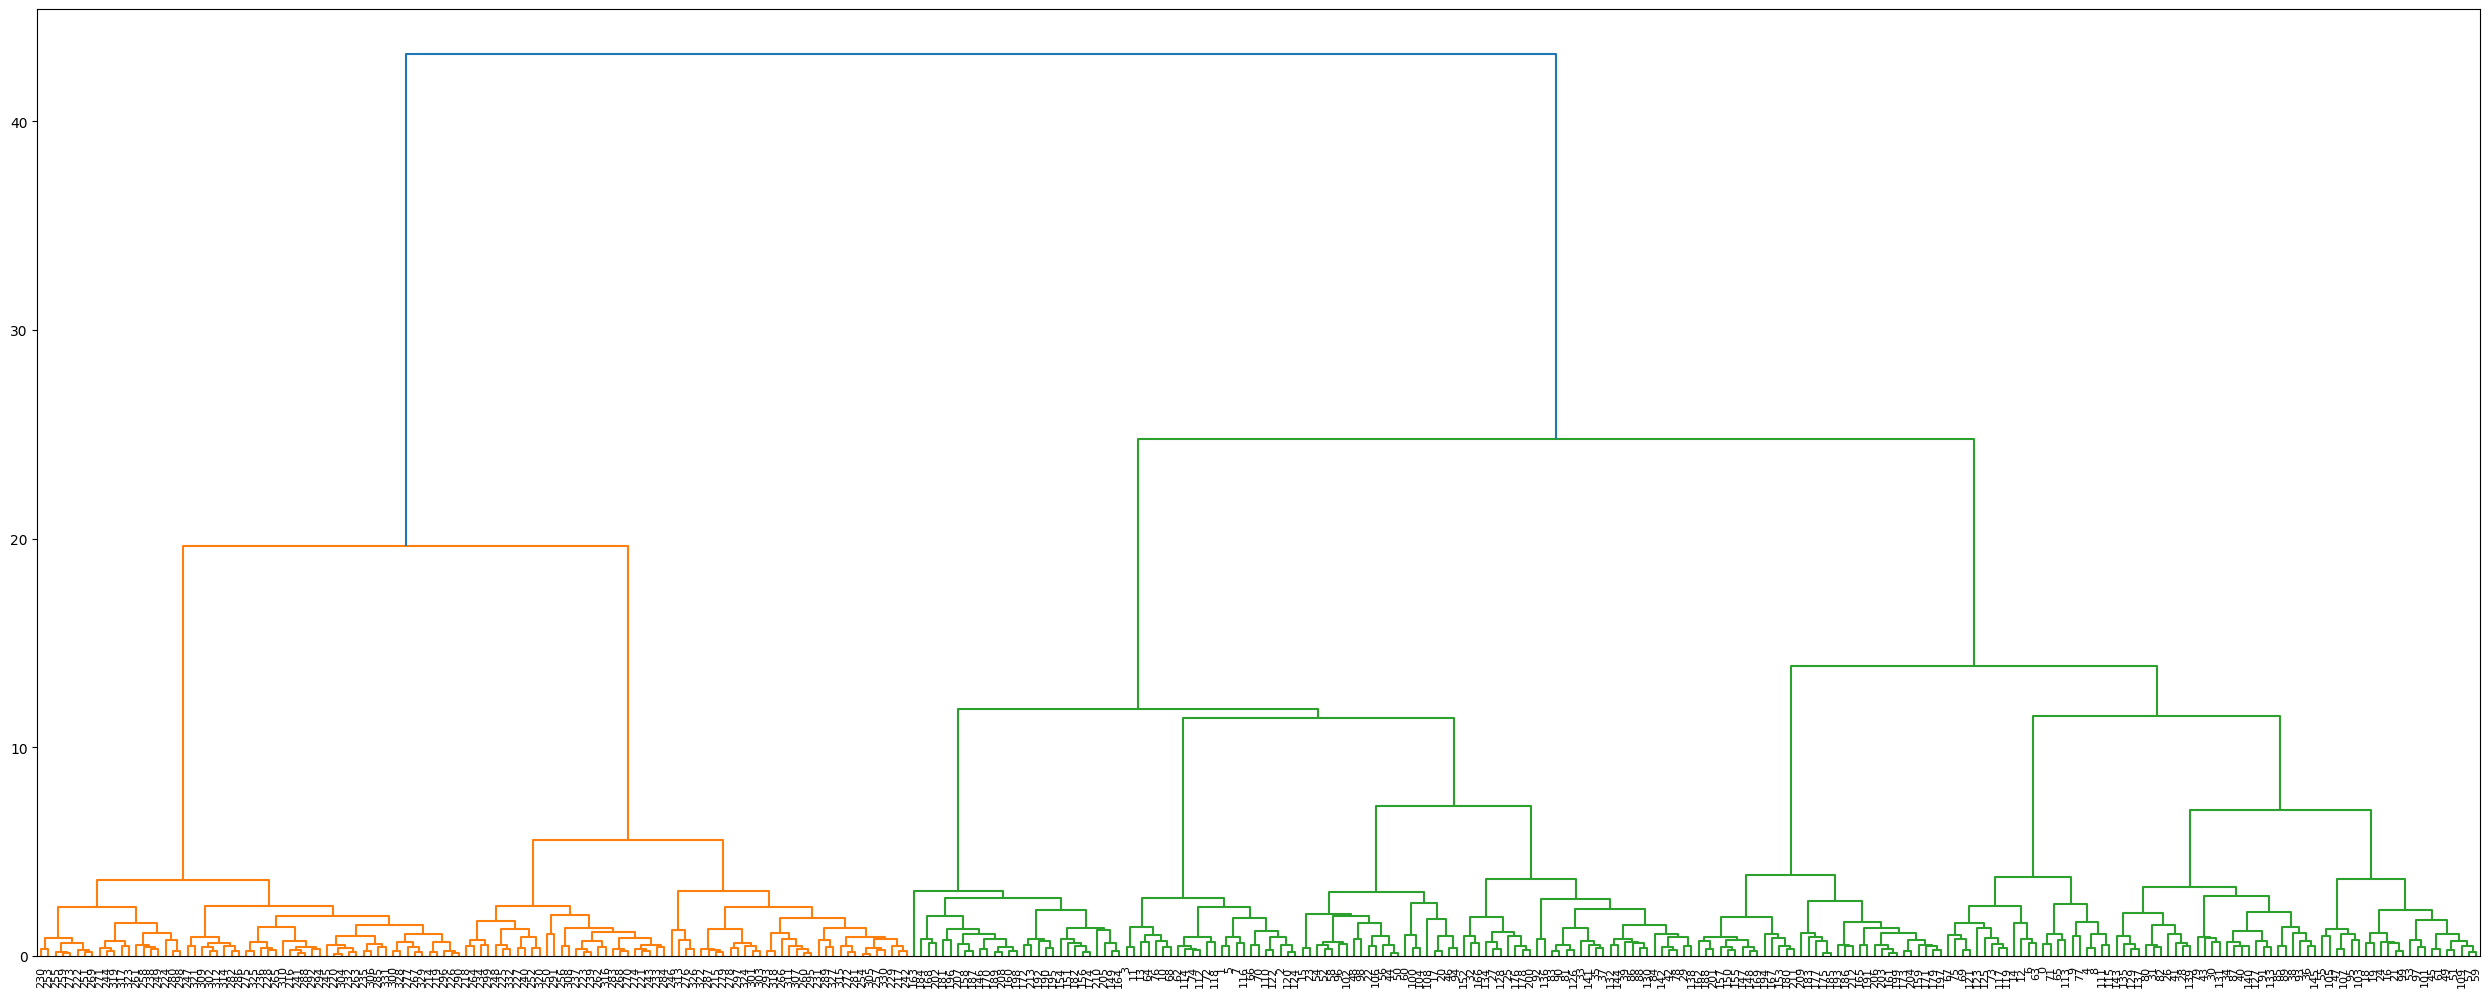

In [49]:
plt.figure(figsize=(25,10))
linkage_data = linkage(data2, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.xticks(rotation=90,fontsize=8)
plt.show()

I tried to make a dendrogram (since they are pretty cool visualizations of hierarchical clustering), but I couldn't quite find a way to make this dendrogram legible. (So far, I've made more successful dendrograms in R than in Python.)

If I had given myself more time to figure it out, I feel like I could've shown the hierarchical relationships between species (for instance, we probably could've seen that Adelies and Chinstraps had more similarities to each other than Gentoos as we saw in k-means clustering) But I don't want to worry about this as assignment any longer (but I do hope to come back and figure it out in my own free time).

## Question 3

**Cluster the dataset using DBSCAN with appropriate hyperparameters.**

# Question 4 (optional)

**Cluster the dataset using a Grid-based method (you can define your own grid)**

# Question 5 (optional)

**Search and learn one Evaluation criterion for clustering analysis, and apply it in your analysis.**

# Question 6 (optional)

**Conduct a clustering analysis for "Facebook Live Sellers in Thailand Data Set"**

# Question 7 

**Use PCA analysis to extract the most important two features for classification or regression. Compare your result before and after PCA**

## Before PCA

In [50]:
X = data2.copy()
y = label2.copy()

In [51]:
X.shape

(333, 6)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [53]:
from sklearn.tree import DecisionTreeClassifier

#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
#test model
dt_classifier.score(X_test,y_test)

0.9701492537313433

## After PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(333, 2)

In [55]:
X_pca

array([[-2.26674761,  1.30575539],
       [-2.10442056, -0.48180863],
       [-2.16732647, -0.35505437],
       [-2.61379606, -0.12460522],
       [-2.32344985,  1.85414558],
       [-2.5162735 , -0.43489925],
       [-1.3184235 ,  1.75193432],
       [-2.54977881, -0.45963096],
       [-2.35109022,  2.01980435],
       [-1.98912238,  1.9155146 ],
       [-2.48990845, -0.52602239],
       [-2.33859986, -0.11113473],
       [-1.30990436,  2.19681707],
       [-3.03352734, -0.52791986],
       [-1.49690801,  2.53594757],
       [-1.96171779, -1.12818284],
       [-1.37465839,  0.47770749],
       [-1.45499946, -0.86896653],
       [-0.82368181,  0.39969469],
       [-0.89764791,  0.13741875],
       [-1.51928526, -0.98652667],
       [-1.06374599,  0.58425211],
       [-1.33576104, -1.12795597],
       [-2.24029225, -1.08480173],
       [-0.9836274 ,  0.7309328 ],
       [-2.05881698, -1.15725646],
       [-1.75161475,  0.69853083],
       [-1.85457026, -0.81897296],
       [-1.40099422,

In [56]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [57]:
#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca,y_train)
#test model
dt_classifier.score(X_test_pca,y_test)

0.9104477611940298

Accuracy actually went down in this case. 

# Question 8 

**Use PCA analysis to extract features that represent 80% variance for classification or regression. Compare your result before and after using PCA.**

In [58]:
pca2 = PCA(0.80)
X_pca2 = pca2.fit_transform(X)
X_pca2.shape

(333, 3)

In [59]:
X_train_pca2, X_test_pca2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2, random_state=30)

In [60]:
#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca2,y_train2)
#test model
dt_classifier.score(X_test_pca2,y_test2)

0.9552238805970149

This did better than the last PCA application, but in this case, it also included more features (3 columns instead of 2). Therefore, so far, these results suggest that reducing dimensionality is not necessarily an improvement. But it is possible that it is because of the classifier model I chose (decision trees tend to be pretty high-performing models in general). So maybe I could've seen more of an improvement if I tried a different model (but I unfortunately didn't give myself time to try for this assignment (although I might try myself later)). 

# Question 9

**Summarize your findings**

I kinda summarized as I finished each question/section. So I hope that counts (more or less).